부화한 병아리들의 몸무게는 얼마?

(정규분포와 중심극한 정리)

2-1 데이터 불러와서 구조와 유형확인하기

In [2]:
import pandas as pd

b = pd.read_csv('ch4-2.csv')

b.head()

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [3]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [4]:
b.describe()

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


표준 편차

만약 부화장 a b 평균은 동일
표준편차가 크면 병아리끼리 차이가 크다는 것이기 때문에 그곳이 문제가 더 많이 발생 할 수 있음

2-3 히스토그램으로 분포확인하기

Text(0, 0.5, '세로')

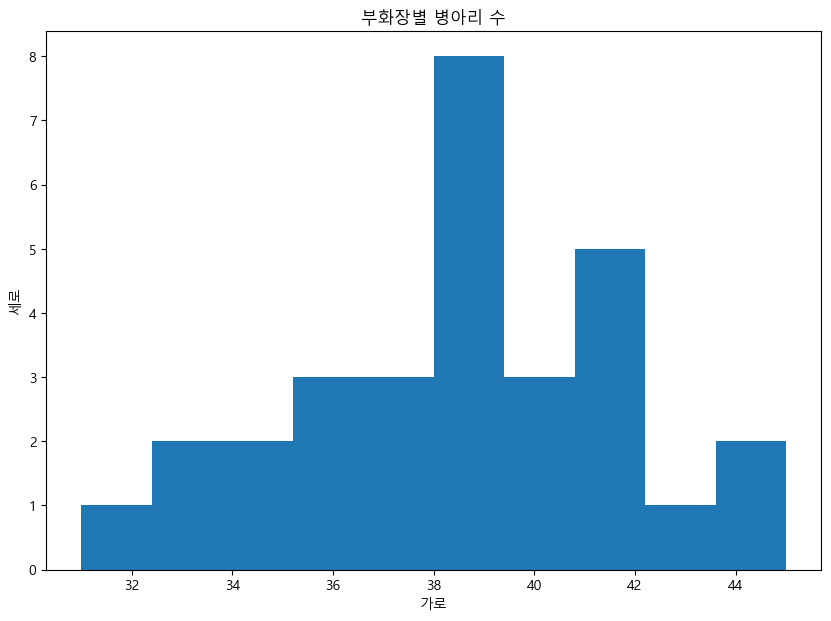

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


plt.figure(figsize=(10,7))
plt.hist(b.weight)
plt.title('부화장별 병아리 수')
plt.xlabel('가로')
plt.ylabel('세로')

2-4 상자그림

Text(0, 0.5, '세로')

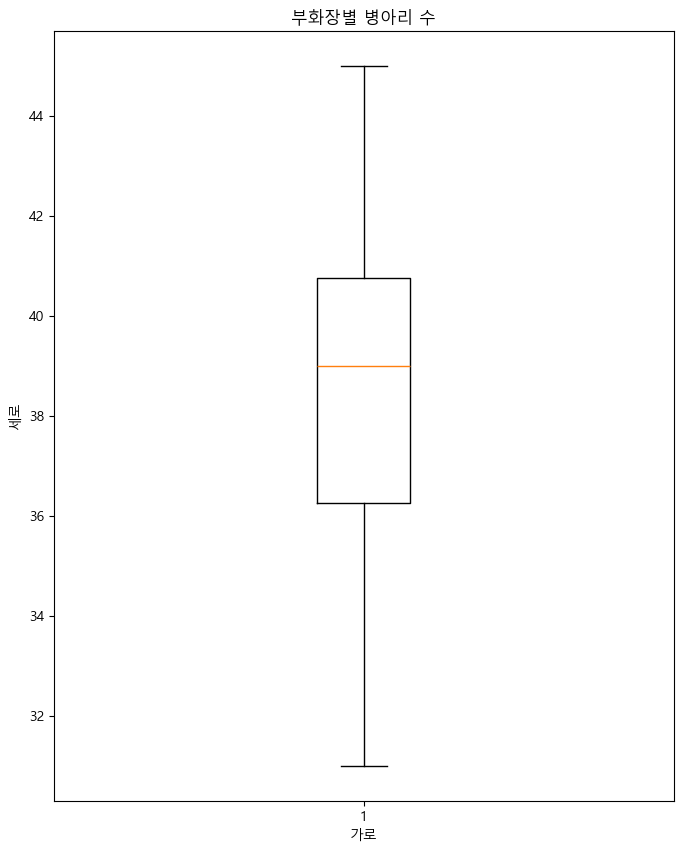

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


plt.figure(figsize=(8,10))
plt.boxplot(b.weight)
plt.title('부화장별 병아리 수')
plt.xlabel('가로')
plt.ylabel('세로')

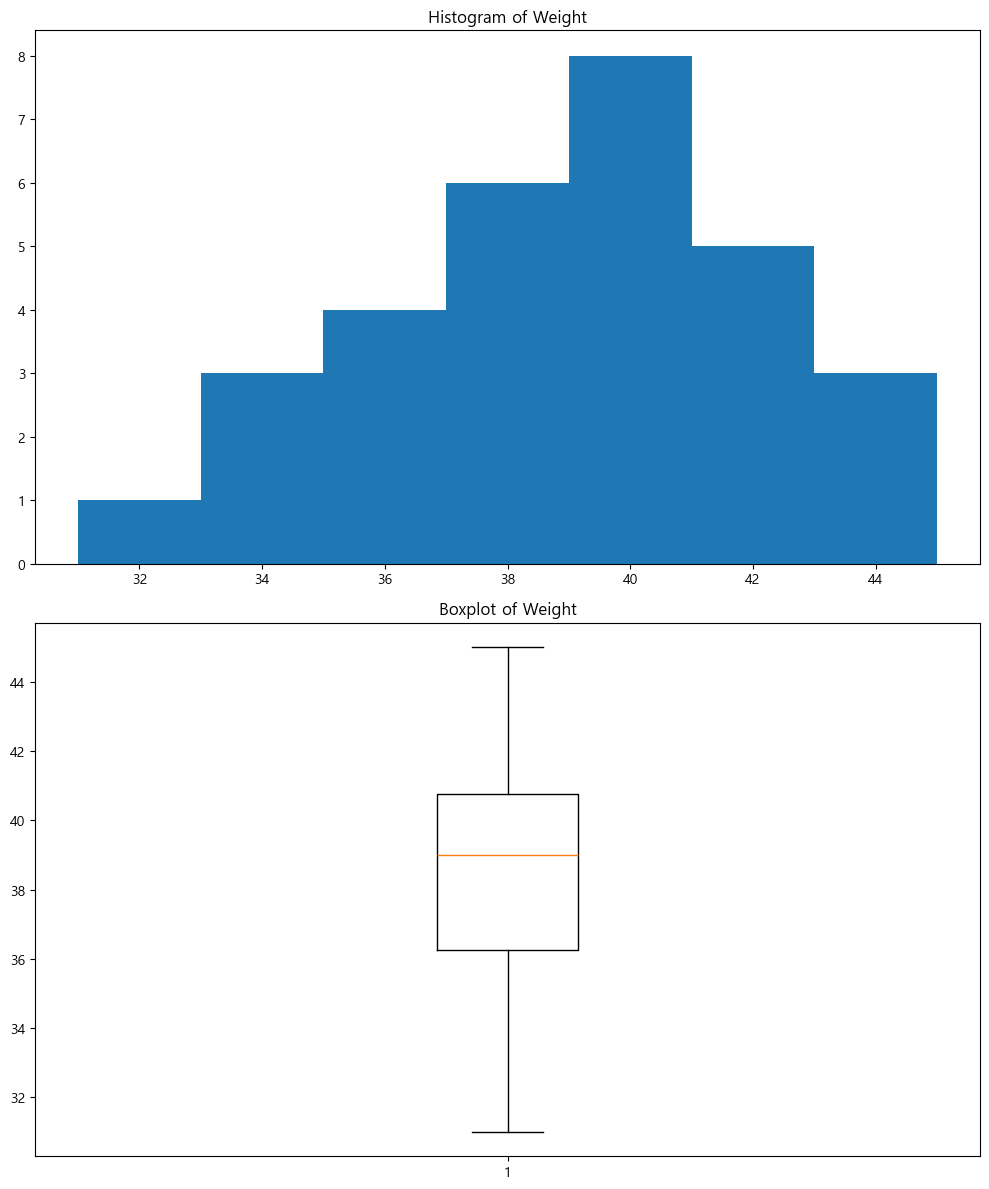

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,12))

# 히스토그램 그리기
ax1.hist(b.weight, bins=7)
ax1.set_title('Histogram of Weight')

# 박스플롯 그리기 
ax2.boxplot(b.weight)
ax2.set_title('Boxplot of Weight')

plt.tight_layout()
plt.show()


중심 극한 정리

사료 제조사별

In [15]:
import pandas as pd

test = pd.read_csv('ch4-3.csv')

test.head()

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116


3-2 상자그림으로 분포 비교

<Axes: xlabel='weight', ylabel='hatchery'>

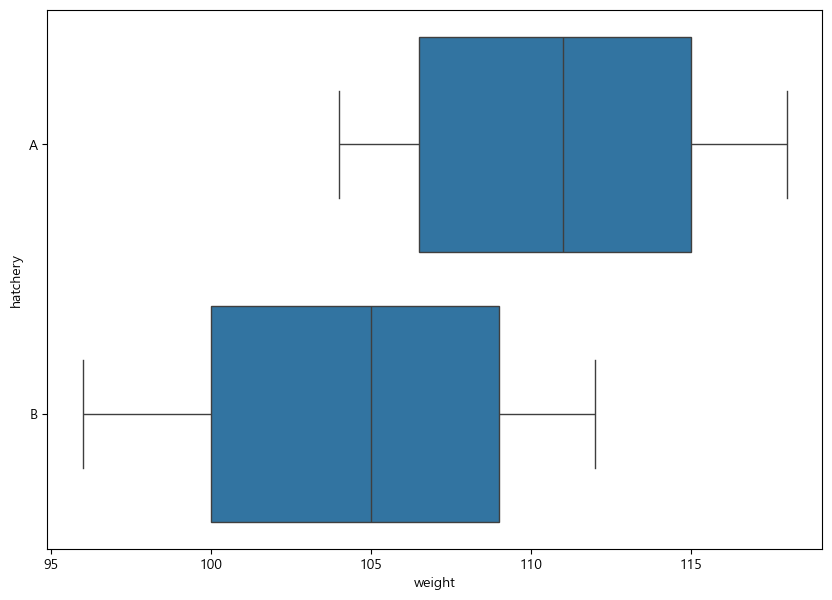

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.boxplot(x='weight',y='hatchery',data=test)

통계적으로 두 집단간의 몸무게가 같은지 다른지는 어떻게 설명할 수 있을까?

->"가설 검정" 

3-3 정규 분포 검정

가설검정 방법론인 t-test를 통해서 진행한다.



In [27]:
import scipy as sp

# 부화장 a를 별도로 데이터 셋 구성
test_a = test.loc[test.hatchery=='A','weight']
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400016973451231, pvalue=0.5530322552073004)